In [1]:
from ImageExtracterConfig import ImageExtracterConfig

import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
import math
import numpy as np
import numpy.ma as ma
import os
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from pathlib import Path
import tables

import astropy.units as u
from astropy.io import fits
from astropy.table import Table, vstack

from traitlets.config.loader import Config
from ctapipe_io_lst import LSTEventSource
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay
from ctapipe.image import hillas_parameters

from lstchain.io.config import read_configuration_file
import lstchain.reco.utils as utils
from lstchain.reco import r0_to_dl1
from lstchain.io.io import dl1_images_lstcam_key, dl1_params_tel_mon_ped_key, dl1_params_tel_mon_cal_key, dl1_params_lstcam_key, dl1_params_src_dep_lstcam_key

from ctapipe.utils import get_dataset_path
from ctapipe.io import EventSource
from ctapipe.io.eventseeker import EventSeeker
#import astropy.units as u
#from copy import deepcopy

from scipy.stats import binned_statistic



In [2]:
from logging import getLogger,StreamHandler,DEBUG,INFO,WARNING,ERROR,CRITICAL

##### Logger #####
logger = getLogger(__name__)
handler = StreamHandler()
loglevel = 'DEBUG'
handler.setLevel(loglevel)
logger.setLevel(loglevel)
logger.addHandler(handler)

In [3]:
from lstchain import __version__ as lstchain_version
logger.info(lstchain_version)

0.7.3.post19+gitdeabb5c


In [4]:
# Matplotlib setup
plt.rcParams["font.size"] = 13

LINE_STYLES = ["solid", "dashed", "dashdot", "dotted"]
MARKER_STYLES = ['o', 's', 'x', '+', 'D', 'X', 'p', 'd', '<', '>', '^', 'v', 'H']

#plt.xkcd()

# Config of ImageExtracter

In [5]:
# Replace OUTPUT_DIR_PATH by your directory
OUTPUT_DIR_PATH = Path('/home/mitsunari.takahashi/Work/analysis/low-level/ChargeExtraction_test')
if not OUTPUT_DIR_PATH.exists():
    os.makedirs(OUTPUT_DIR_PATH)

## List of confugurations to evaluate  

In [6]:
image_extracter_configs = []

# LocalPeakWindowSum
for window_width in (5,):
    window_shift = int(window_width/2)
    image_extracter_configs.append(ImageExtracterConfig('LocalPeakWindowSum', 
                                                        {'window_shift':window_shift,
                                                         'window_width':window_width,
                                                         'apply_integration_correction':'true'}, 
                                                       output_dir_path=OUTPUT_DIR_PATH, 
                                                       config_dir_path=OUTPUT_DIR_PATH))
    
# NeighborPeakWindowSum
for window_width in (5,):
    window_shift = int(window_width/2)
    for lwt in (0, ):#1):
        image_extracter_configs.append(ImageExtracterConfig('NeighborPeakWindowSum', 
                                                            {'window_shift':window_shift, 
                                                             'window_width':window_width,
                                                             'lwt':lwt,
                                                             'apply_integration_correction':'true'}, 
                                                       output_dir_path=OUTPUT_DIR_PATH, 
                                                       config_dir_path=OUTPUT_DIR_PATH))
        
# SlidingWindowMaxSum
for window_width in (5,):
    image_extracter_configs.append(ImageExtracterConfig('SlidingWindowMaxSum', 
                                                        {'window_width':window_width,
                                                         'apply_integration_correction':'true'}, 
                                                       output_dir_path=OUTPUT_DIR_PATH, 
                                                       config_dir_path=OUTPUT_DIR_PATH))

# TwoPassWindowSum
for core_threshold in (6,):
    image_extracter_configs.append(ImageExtracterConfig('TwoPassWindowSum', 
                                                        {'core_threshold':core_threshold, 
                                                         'disable_second_pass':'false',
                                                         'apply_integration_correction':'true'}, 
                                                       output_dir_path=OUTPUT_DIR_PATH, 
                                                       config_dir_path=OUTPUT_DIR_PATH))
    
# FullWaveformSum
image_extracter_configs.append(ImageExtracterConfig('FullWaveformSum', 
                                                    output_dir_path=OUTPUT_DIR_PATH, 
                                                    config_dir_path=OUTPUT_DIR_PATH))

# Write the config files down         
for c in image_extracter_configs:
    c.write_configfile()

"LocalPeakWindowSum":{
    "window_shift": 2,
    "window_width": 5,
    "apply_integration_correction": true
  },
{
  "source_config" : {
    "EventSource": {
      "allowed_tels": [1, 2, 3, 4],
      "max_events": null
    },
    "LSTEventSource": {
      "default_trigger_type": "ucts",
      "allowed_tels": [1],
      "min_flatfield_adc": 3000,
      "min_flatfield_pixel_fraction": 0.8,
      "calibrate_flatfields_and_pedestals": false,
      "EventTimeCalculator": {
        "dragon_reference_counter": null,
        "dragon_reference_time": null
      },
      "PointingSource":{
        "drive_report_path": null
      },
      "LSTR0Corrections":{
        "drs4_pedestal_path": null,
        "calibration_path": null,
        "drs4_time_calibration_path": null
      }
    }
  },

  "events_filters": {
    "intensity": [0, Infinity],
    "width": [0, Infinity],
    "length": [0, Infinity],
    "wl": [0, 1],
    "r": [0, 1],
    "leakage_intensity_width_2": [0, 1]
  },

  "tailcut": {
 

"SlidingWindowMaxSum":{
    "window_width": 5,
    "apply_integration_correction": true
  },
{
  "source_config" : {
    "EventSource": {
      "allowed_tels": [1, 2, 3, 4],
      "max_events": null
    },
    "LSTEventSource": {
      "default_trigger_type": "ucts",
      "allowed_tels": [1],
      "min_flatfield_adc": 3000,
      "min_flatfield_pixel_fraction": 0.8,
      "calibrate_flatfields_and_pedestals": false,
      "EventTimeCalculator": {
        "dragon_reference_counter": null,
        "dragon_reference_time": null
      },
      "PointingSource":{
        "drive_report_path": null
      },
      "LSTR0Corrections":{
        "drs4_pedestal_path": null,
        "calibration_path": null,
        "drs4_time_calibration_path": null
      }
    }
  },

  "events_filters": {
    "intensity": [0, Infinity],
    "width": [0, Infinity],
    "length": [0, Infinity],
    "wl": [0, 1],
    "r": [0, 1],
    "leakage_intensity_width_2": [0, 1]
  },

  "tailcut": {
    "picture_thresh":6,

"FullWaveformSum":{

  },
{
  "source_config" : {
    "EventSource": {
      "allowed_tels": [1, 2, 3, 4],
      "max_events": null
    },
    "LSTEventSource": {
      "default_trigger_type": "ucts",
      "allowed_tels": [1],
      "min_flatfield_adc": 3000,
      "min_flatfield_pixel_fraction": 0.8,
      "calibrate_flatfields_and_pedestals": false,
      "EventTimeCalculator": {
        "dragon_reference_counter": null,
        "dragon_reference_time": null
      },
      "PointingSource":{
        "drive_report_path": null
      },
      "LSTR0Corrections":{
        "drs4_pedestal_path": null,
        "calibration_path": null,
        "drs4_time_calibration_path": null
      }
    }
  },

  "events_filters": {
    "intensity": [0, Infinity],
    "width": [0, Infinity],
    "length": [0, Infinity],
    "wl": [0, 1],
    "r": [0, 1],
    "leakage_intensity_width_2": [0, 1]
  },

  "tailcut": {
    "picture_thresh":6,
    "boundary_thresh":3,
    "keep_isolated_pixels":false,
    "mi

# Shower event selection

In [7]:
EMIN = 10 *u.GeV
EMAX = 50 *u.GeV

# MC DL0 data

In [8]:
dl0_path = Path('/fefs/aswg/workspace/yoshiki.ohtani/Data/LaPalma/4LSTs_MAGIC/gamma-diffuse/zenith_20deg/south_pointing/run1000/sim_telarray_v3_trans_80%/cta-prod5-lapalma_4LSTs_MAGIC/0.0deg/Data/gamma_20deg_180deg_run1000___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono_cone6.simtel.gz')
#dl0_path = Path('/fefs/aswg/data/mc/DL0/20200629_prod5/gamma-diffuse/zenith_20deg/south_pointing/gamma_20deg_180deg_run1___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono_cone6.simtel.gz')

In [9]:
tel_id = 1 #LST-1
allowed_tels = {tel_id}
source = EventSource(dl0_path)
source.allowed_tels = allowed_tels

In [10]:
counter = 0
true_phe = []
true_log10_phe = []
true_energy = []
event_used = []

for event in source:
    event_id = event.index.event_id
    true_image = event.simulation.tel[tel_id].true_image
    # Energy cut
    if EMIN <= event.simulation.shower.energy < EMAX:
        event_used.append(True)
        for trimg in true_image:
            true_phe.append(trimg)
            true_log10_phe.append(np.log10(max(0.1,trimg)))
        counter+=1
    else:
        event_used.append(False)
logger.debug('{0} shower events'.format(counter))

320 shower events


In [11]:
true_phe = np.array(true_phe)
true_log10_phe = np.array(true_log10_phe)
event_used = np.array(event_used)
#true_energy = np.array(true_energy)

# DL1 data

In [12]:
for image_extracter_config in image_extracter_configs:
    logger.info(image_extracter_config.config_name)
    dl1_production_result = image_extracter_config.produce_mc_dl1(dl0_path=dl0_path)
    if dl1_production_result!=0:
        logger.error('Producing DL1 file failed!!')

LocalPeakWindowSum_window_shift2_window_width5_apply_integration_correctiontrue
/home/mitsunari.takahashi/Work/analysis/low-level/ChargeExtraction_test/LocalPeakWindowSum_window_shift2_window_width5_apply_integration_correctiontrue/dl1_gamma_20deg_180deg_run1000___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono_cone6.h5 already exists! It was modified 19 hr 47 min before.
NeighborPeakWindowSum_window_shift2_window_width5_lwt0_apply_integration_correctiontrue
/home/mitsunari.takahashi/Work/analysis/low-level/ChargeExtraction_test/NeighborPeakWindowSum_window_shift2_window_width5_lwt0_apply_integration_correctiontrue/dl1_gamma_20deg_180deg_run1000___cta-prod5-lapalma_4LSTs_MAGIC_desert-2158m_mono_cone6.h5 already exists! It was modified 19 hr 44 min before.
SlidingWindowMaxSum_window_width5_apply_integration_correctiontrue
/home/mitsunari.takahashi/Work/analysis/low-level/ChargeExtraction_test/SlidingWindowMaxSum_window_width5_apply_integration_correctiontrue/dl1_gamma_20deg_180deg_run10

## DL1 Data Readout

In [13]:
for image_extracter_config in image_extracter_configs:
    image_extracter_config.read_dl1(event_used)#emin=EMIN, emax=EMAX)
    if len(image_extracter_config.dl1_reco_phe)!=len(true_phe):
        logger.critical('The pulse number of DL0 and DL1 does not match!!!')

DL1 event number: 320 events
DL1 event number: 320 events
DL1 event number: 320 events
DL1 event number: 320 events
DL1 event number: 320 events


In [14]:
for image_extracter_config in image_extracter_configs:
    image_extracter_config.calc_correlations(true_phe)

# Plot

/home/mitsunari.takahashi/miniconda3/envs/lst-dev/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/home/mitsunari.takahashi/miniconda3/envs/lst-dev/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/home/mitsunari.takahashi/miniconda3/envs/lst-dev/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/home/mitsunari.takahashi/miniconda3/envs/lst-dev/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in true_divide
/home/mitsunari.takahashi/miniconda3/envs/lst-dev/lib/python3.7/site-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in true_divide
/home/mitsunari.takahashi/miniconda3/envs/lst-dev/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: invalid value encounter

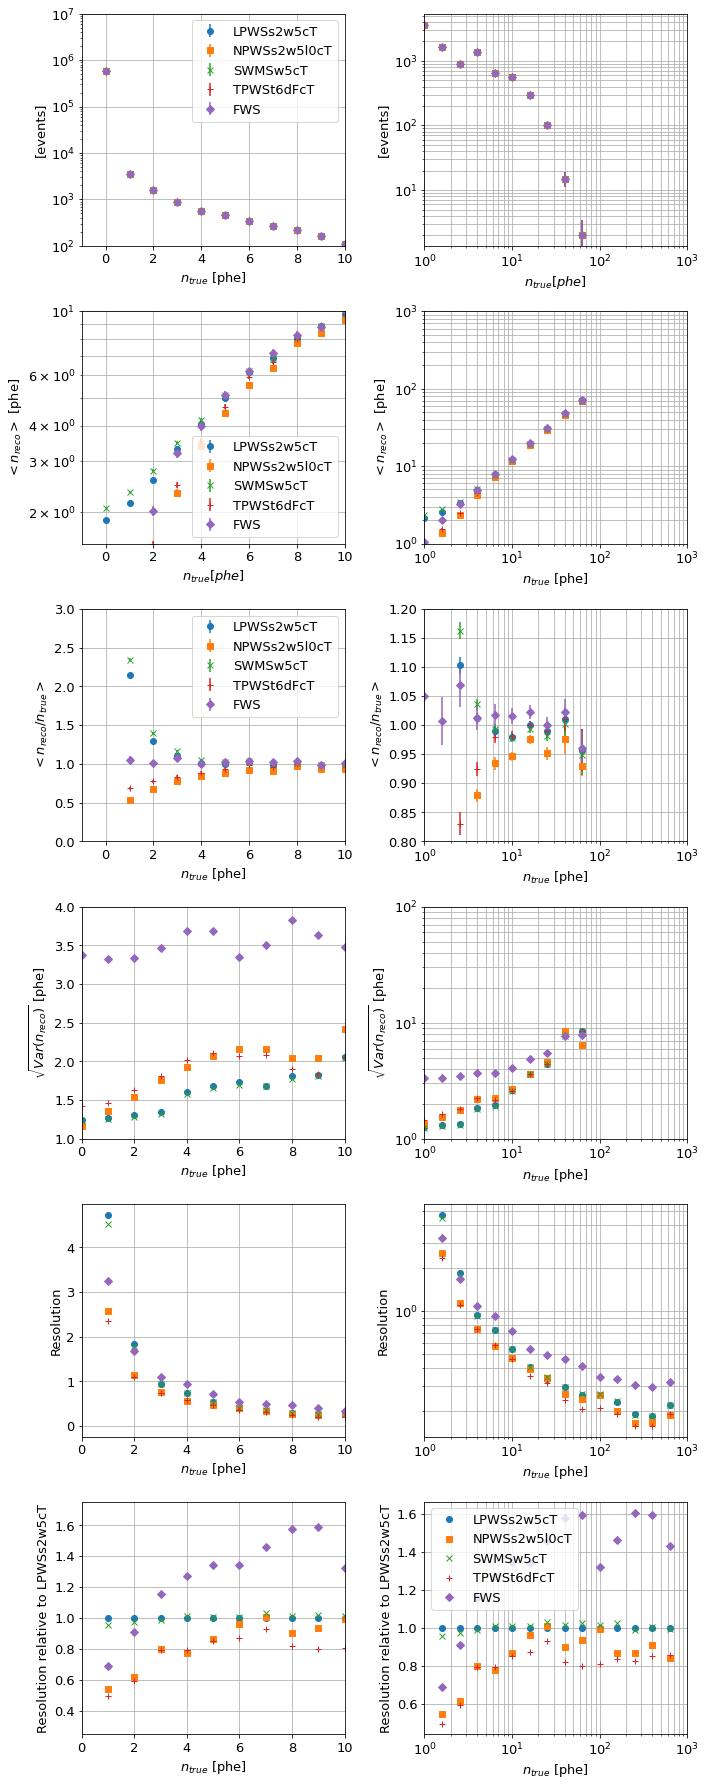

In [15]:
image_extracter_config_benchmark = image_extracter_configs[0]

fig, axes = plt.subplots(6, 2, figsize=(10, 25))
for i, image_extracter_config in enumerate(image_extracter_configs):
    
    iax = 0
    
    # Linear X-axis
    xvalues = (image_extracter_config.reco_stats['mean'][1][:-1])
    
    # Log X-axis    
    logxvalues = (image_extracter_config.reco_stats_log['mean'][1][:-1])
        
    # Event count 
    axes[iax][0].errorbar(xvalues, \
                          image_extracter_config.reco_stats['count'][0], \
                          yerr=np.sqrt(image_extracter_config.reco_stats['count'][0]), \
                          fmt=MARKER_STYLES[i%len(MARKER_STYLES)], \
                          label=image_extracter_config.abbreviation)
    axes[iax][0].grid(True, which='major', axis='both')
    axes[iax][0].set_yscale('log')
    axes[iax][0].set_xlim(-1, 10)
    axes[iax][0].set_ylim(100, 1e7)
    axes[iax][0].set_xlabel(r'$n_{true}$ [phe]')
    axes[iax][0].set_ylabel('[events]')
    #axes[iax][0].legend(loc=0)


    axes[iax][1].errorbar(logxvalues, \
                          image_extracter_config.reco_stats_log['count'][0], \
                          yerr=np.sqrt(image_extracter_config.reco_stats_log['count'][0]), \
                          fmt=MARKER_STYLES[i%len(MARKER_STYLES)], \
                          label=image_extracter_config.abbreviation)
    axes[iax][1].set_xscale('log')
    axes[iax][1].set_yscale('log')
    axes[iax][1].set_xlim(1, 1000)
    #axes[iax][1].set_ylim(1, 1000)
    axes[iax][1].grid(True, which='both', axis='both')
    axes[iax][1].set_xlabel(r'$n_{true} [phe]$')
    axes[iax][1].set_ylabel('[events]')
                         
    iax += 1
        
    axes[iax][0].errorbar(xvalues, \
                          image_extracter_config.reco_stats['mean'][0], \
                          yerr=image_extracter_config.reco_stats['std'][0]/np.sqrt(image_extracter_config.reco_stats['count'][0]), \
                          fmt=MARKER_STYLES[i%len(MARKER_STYLES)], \
                          label=image_extracter_config.abbreviation)
    axes[iax][0].grid(True, which='both', axis='both')
    axes[iax][0].set_yscale('log')
    axes[iax][0].set_xlim(-1, 10)
    axes[iax][0].set_ylim(-1, 10)
    axes[iax][0].set_xlabel(r'$n_{true} [phe]$')
    axes[iax][0].set_ylabel(r'$<n_{reco}>$ [phe]')
    axes[iax][0].legend(loc=0)


    axes[iax][1].errorbar(logxvalues, \
                          image_extracter_config.reco_stats_log['mean'][0], \
                          yerr=image_extracter_config.reco_stats_log['std'][0]/np.sqrt(image_extracter_config.reco_stats_log['count'][0]), \
                          fmt=MARKER_STYLES[i%len(MARKER_STYLES)], \
                          label=image_extracter_config.abbreviation)
    axes[iax][1].set_xscale('log')
    axes[iax][1].set_yscale('log')
    axes[iax][1].set_xlim(1, 1000)
    axes[iax][1].set_ylim(1, 1000)
    axes[iax][1].grid(True, which='both', axis='both')
    axes[iax][1].set_xlabel(r'$n_{true}$ [phe]')
    axes[iax][1].set_ylabel(r'$<n_{reco}>$ [phe]')
                         
    iax += 1

    axes[iax][0].errorbar(xvalues[1:], \
                          image_extracter_config.reco_frac_stats['mean'][0][1:], \
                          yerr=image_extracter_config.reco_frac_stats['std'][0][1:]/np.sqrt(image_extracter_config.reco_frac_stats['count'][0][1:]), \
                          fmt=MARKER_STYLES[i%len(MARKER_STYLES)], \
                    label=image_extracter_config.abbreviation)
    axes[iax][0].grid(True, which='both', axis='both')
    axes[iax][0].set_xlim(-1, 10)
    axes[iax][0].set_ylim(0, 3)
    axes[iax][0].set_xlabel(r'$n_{true}$ [phe]')
    axes[iax][0].set_ylabel(r'$<n_{reco}/n_{true}>$')

    # Log X-axis    
    axes[iax][1].errorbar(logxvalues, \
                          image_extracter_config.reco_frac_stats_log['mean'][0], \
                          yerr=image_extracter_config.reco_frac_stats_log['std'][0]/np.sqrt(image_extracter_config.reco_frac_stats_log['count'][0]), \
                          fmt=MARKER_STYLES[i%len(MARKER_STYLES)], \
                          label=image_extracter_config.abbreviation)
    axes[iax][1].set_xscale('log')
    axes[iax][1].set_xlim(1, 1000)
    axes[iax][1].set_ylim(0.8, 1.2)
    axes[iax][1].grid(True, which='both', axis='both')
    axes[iax][1].set_xlabel(r'$n_{true}$ [phe]')
    axes[iax][1].set_ylabel(r'$<n_{reco}/n_{true}>$')
                         
    iax += 1
    
    axes[iax][0].plot(xvalues, \
                    image_extracter_config.reco_stats['std'][0], MARKER_STYLES[i%len(MARKER_STYLES)], \
                    label=image_extracter_config.abbreviation)
    axes[iax][0].grid(True, which='both', axis='both')
    axes[iax][0].set_xlim(0, 10)
    axes[iax][0].set_ylim(1, 4)
    axes[iax][0].set_xlabel(r'$n_{true}$ [phe]')
    axes[iax][0].set_ylabel(r'$\sqrt{Var(n_{reco})}$ [phe]')

    axes[iax][1].plot(logxvalues, \
                    image_extracter_config.reco_stats_log['std'][0], MARKER_STYLES[i%len(MARKER_STYLES)], \
                    label=image_extracter_config.abbreviation)
    axes[iax][1].set_xscale('log')
    axes[iax][1].set_yscale('log')
    axes[iax][1].grid(True, which='both', axis='both')
    axes[iax][1].set_xlim(1, 1000)
    axes[iax][1].set_ylim(1, 100)
    axes[iax][1].set_xlabel(r'$n_{true}$ [phe]')
    axes[iax][1].set_ylabel(r'$\sqrt{Var(n_{reco})}$ [phe]')   
                         
    iax += 1
    axes[iax][0].plot(xvalues[1:], \
                    image_extracter_config.reco_stats['std'][0][1:] / \
                    (image_extracter_config.reco_stats['mean'][0][1:]-image_extracter_config.mean_phe_true0), \
                    MARKER_STYLES[i%len(MARKER_STYLES)], \
                    label=image_extracter_config.abbreviation)
    axes[iax][0].grid(True, which='both', axis='both')
    axes[iax][0].set_xlim(0, 10)
    axes[iax][0].set_xlabel(r'$n_{true}$ [phe]')
    axes[iax][0].set_ylabel('Resolution') #(r'$\sqrt{Var(n_{reco})} / (\bar{n}_{reco}-\bar{n}_{reco}(n_{true}=0))$')

    axes[iax][1].plot(logxvalues[1:], \
                    image_extracter_config.reco_stats['std'][0][1:len(logxvalues)] / \
                    (image_extracter_config.reco_stats['mean'][0][1:len(logxvalues)]-image_extracter_config.mean_phe_true0), \
                    MARKER_STYLES[i%len(MARKER_STYLES)], \
                    label=image_extracter_config.abbreviation)
    axes[iax][1].set_xscale('log')
    axes[iax][1].set_yscale('log')
    axes[iax][1].grid(True, which='both', axis='both')
    axes[iax][1].set_xlim(1, 1000)
    #axes[iax][0].set_ylim(0, 3)
    axes[iax][1].set_xlabel(r'$n_{true}$ [phe]')
    axes[iax][1].set_ylabel('Resolution')#r'$\sqrt{Var(n_{reco})} / (\bar{n}_{reco}-\bar{n}_{reco}(n_{true}=0))$')
    
    iax += 1
    axes[iax][0].plot(xvalues[1:], \
                      image_extracter_config.reco_stats['std'][0][1:] / \
                      image_extracter_config_benchmark.reco_stats['std'][0][1:] / \
                      (image_extracter_config.reco_stats['mean'][0][1:]-image_extracter_config.mean_phe_true0) * \
                      (image_extracter_config_benchmark.reco_stats['mean'][0][1:]-image_extracter_config_benchmark.mean_phe_true0), \
                      MARKER_STYLES[i%len(MARKER_STYLES)], label=image_extracter_config.abbreviation)
    axes[iax][0].grid(True, which='both', axis='both')
    axes[iax][0].set_xlim(0, 10)
    axes[iax][0].set_ylim(0.25, 1.75)
    axes[iax][0].set_xlabel(r'$n_{true}$ [phe]')
    axes[iax][0].set_ylabel('Resolution relative to {0}'.format(image_extracter_config_benchmark.abbreviation))    

    axes[iax][1].plot(logxvalues[1:], \
                      image_extracter_config.reco_stats['std'][0][1:len(logxvalues)] / \
                      image_extracter_config_benchmark.reco_stats['std'][0][1:len(logxvalues)] / \
                      (image_extracter_config.reco_stats['mean'][0][1:len(logxvalues)]-image_extracter_config.mean_phe_true0) * \
                      (image_extracter_config_benchmark.reco_stats['mean'][0][1:len(logxvalues)]-image_extracter_config_benchmark.mean_phe_true0), \
                      MARKER_STYLES[i%len(MARKER_STYLES)], label=image_extracter_config.abbreviation)
    axes[iax][1].set_xscale('log')
    #axes[iax][1].set_yscale('log')
    axes[iax][1].grid(True, which='both', axis='both')
    axes[iax][1].set_xlim(1, 1000)
    #axes[iax][0].set_ylim(0, 3)
    axes[iax][1].set_xlabel(r'$n_{true}$ [phe]')
    axes[iax][1].set_ylabel('Resolution relative to {0}'.format(image_extracter_config_benchmark.abbreviation))
    
axes[0][0].legend(loc=0)   
axes[2][0].legend(loc=0)
axes[5][1].legend(loc=0)
plt.tight_layout()    

## Distribution for specific-phe-number events

In [16]:
list_true_phes = [0, 3, 6, 10] #List of the true photoelectron numbers to draw the distribution of the reconstructed phe
mask_truephe = {}
true_phe_bins = np.linspace(-10, 30, 81)

for tphe in list_true_phes:
    mask_truephe[tphe] = np.array(true_phe!=tphe)
    logger.debug('True {0}-phe events: {1}'.format(tphe, sum(1-mask_truephe[tphe])))

for i, image_extracter_config in enumerate(image_extracter_configs):
    
    for tphe in list_true_phes:
        image_extracter_config.reco_phe_hists[tphe] = np.histogram(image_extracter_config.dl1_reco_phe, \
                                                                    weights=[float(1-m) for m in mask_truephe[tphe]], \
                                                                  bins=true_phe_bins)

True 0-phe events: 584458
True 3-phe events: 900
True 6-phe events: 337
True 10-phe events: 110


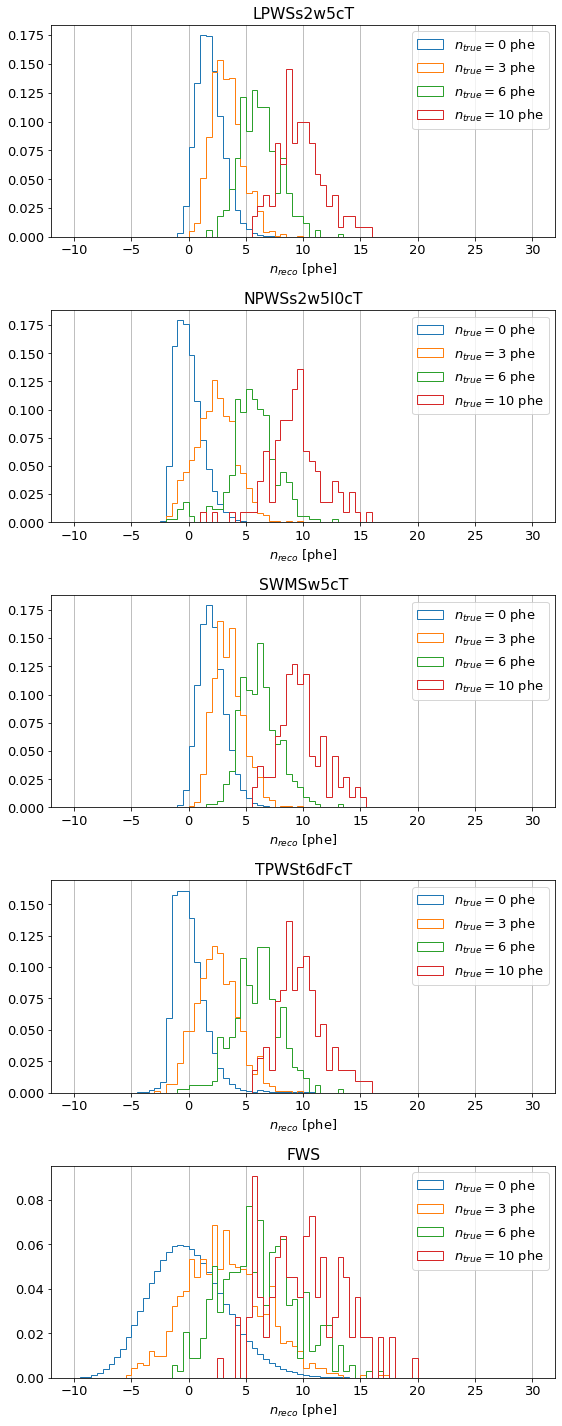

In [17]:
fig, axes = plt.subplots(len(image_extracter_configs), 1, figsize=(8, 4*len(image_extracter_configs)))
for i, image_extracter_config in enumerate(image_extracter_configs):
    for j, tphe in enumerate(list_true_phes):
        axes[i].hist(image_extracter_config.reco_phe_hists[tphe][1][:-1], \
                        image_extracter_config.reco_phe_hists[tphe][1], \
                        weights=image_extracter_config.reco_phe_hists[tphe][0]/sum(image_extracter_config.reco_phe_hists[tphe][0]), \
                        label=r'$n_{{true}}={{{0}}}$ phe'.format(tphe), histtype='step')#, alpha=0.2)
    axes[i].set_title(image_extracter_config.abbreviation)
    axes[i].grid(True, which='major', axis='x')
    axes[i].set_xlabel(r'$n_{reco}$ [phe]')
    axes[i].legend(loc=0)    
plt.tight_layout()  

## ROC Curve

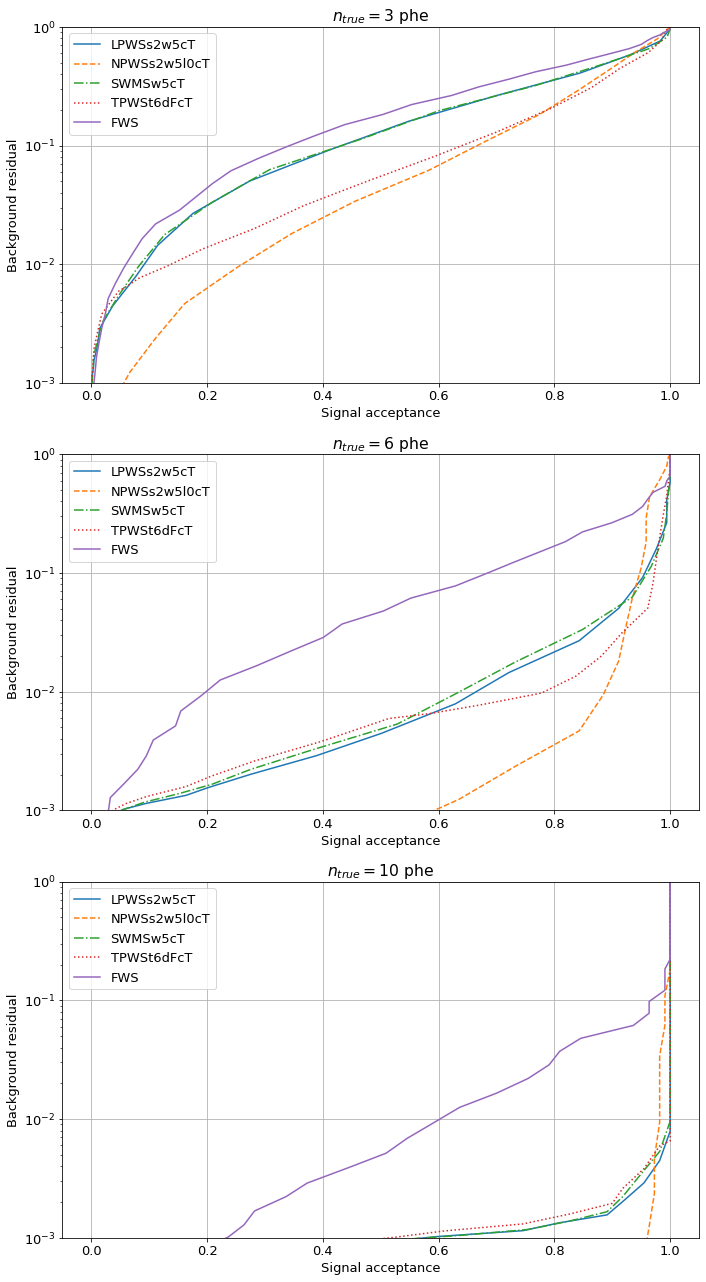

In [18]:
sig_phes = [3, 6, 10]
fig, axes = plt.subplots(len(sig_phes), 1, figsize=(10, 6*len(sig_phes)))

for i, sig_phe in enumerate(sig_phes):
    for j, image_extracter_config in enumerate(image_extracter_configs):
        xvals, yvals = image_extracter_config.get_roc_curve(sig_phe=sig_phe)
        axes[i].plot(xvals, yvals, label=image_extracter_config.abbreviation, ls=LINE_STYLES[j%len(LINE_STYLES)])
    axes[i].set_title(r'$n_{{true}}={0}$ phe'.format(sig_phe))
    axes[i].grid(True, which='major', axis='both')
    axes[i].set_yscale('log')
    axes[i].set_ylim(1e-3, 1)
    axes[i].set_xlabel('Signal acceptance')
    axes[i].set_ylabel('Background residual')
    axes[i].legend(loc=0)    
plt.tight_layout()  

# Separation power evaluation
Not working well yet

In [19]:
for i, image_extracter_config in enumerate(image_extracter_configs):
    logger.info(image_extracter_config.config_name)
    image_extracter_config.find_best_separation('error', [0,3])

LocalPeakWindowSum_window_shift2_window_width5_apply_integration_correctiontrue
Best separation gain: 1.0077100155060308 by 0.0
NeighborPeakWindowSum_window_shift2_window_width5_lwt0_apply_integration_correctiontrue
Best separation gain: 1.0987333934577723 by 1.5
SlidingWindowMaxSum_window_width5_apply_integration_correctiontrue
Best separation gain: 1.01832945410638 by 1.0
TwoPassWindowSum_core_threshold6_disable_second_passfalse_apply_integration_correctiontrue
Best separation gain: 1.088074238313039 by 1.0
FullWaveformSum
Best separation gain: 1.009248827395594 by -5.5


In [20]:
for i, image_extracter_config in enumerate(image_extracter_configs):
    logger.info(image_extracter_config.config_name)
    image_extracter_config.find_best_separation('error', [0,6])

LocalPeakWindowSum_window_shift2_window_width5_apply_integration_correctiontrue
Best separation gain: 1.362359831047557 by 3.5
NeighborPeakWindowSum_window_shift2_window_width5_lwt0_apply_integration_correctiontrue
Best separation gain: 1.3973612787406045 by 3.0
SlidingWindowMaxSum_window_width5_apply_integration_correctiontrue
Best separation gain: 1.3719491837887778 by 4.0
TwoPassWindowSum_core_threshold6_disable_second_passfalse_apply_integration_correctiontrue
Best separation gain: 1.410891732346868 by 2.5
FullWaveformSum
Best separation gain: 1.1631440324307194 by 1.5


In [21]:
for i, image_extracter_config in enumerate(image_extracter_configs):
    logger.info(image_extracter_config.config_name)
    image_extracter_config.find_best_separation('error', [0,10])

LocalPeakWindowSum_window_shift2_window_width5_apply_integration_correctiontrue
Best separation gain: 1.4921488143436492 by 5.5
NeighborPeakWindowSum_window_shift2_window_width5_lwt0_apply_integration_correctiontrue
Best separation gain: 1.472503458004239 by 3.5
SlidingWindowMaxSum_window_width5_apply_integration_correctiontrue
Best separation gain: 1.4905026929373524 by 5.5
TwoPassWindowSum_core_threshold6_disable_second_passfalse_apply_integration_correctiontrue
Best separation gain: 1.493496338503172 by 5.5
FullWaveformSum
Best separation gain: 1.387329358458182 by 5.0
